#### PAIR PROGRAMMING - REGRESIÓN LINEAL - MÉTRICAS


In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y evaluación
# -----------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

En el pair programming anterior creastéis vuestro primer modelo de machine learning usando la regresion Lineal. Es el momento, que con vuestros datos evaluéis si es bueno haciendo predicciones. Los objetivo de este pairprogramming son:

- Calculéis las métricas para vuestro modelo
- Discutid los resultados de las métricas y extraed conclusiones
- Guardad los resultados de las métricas en un csv para usarlo más adelante.

In [2]:
df = pd.read_csv('datos/pokePdcodificado.csv', index_col = 0)
df.head()

,Type,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed_BOX,Type_Bug,Type_Dark,...,Type_Ghost,Type_Grass,Type_Ground,Type_Ice,Type_Normal,Type_Poison,Type_Psychic,Type_Rock,Type_Steel,Type_Water
0,Grass,-0.819945,-0.75000,-0.738095,-0.500000,-0.088889,-0.131579,16.160251,0,0,...,0,1,0,0,0,0,0,0,0,0
1,Poison,-0.819945,-0.75000,-0.738095,-0.500000,-0.088889,-0.131579,16.160251,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Grass,-0.337950,-0.28125,-0.428571,-0.166667,0.244444,0.263158,19.724770,0,0,...,0,1,0,0,0,0,0,0,0,0
3,Poison,-0.337950,-0.28125,-0.428571,-0.166667,0.244444,0.263158,19.724770,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Grass,0.326870,0.34375,0.047619,0.309524,0.688889,0.789474,24.005888,0,0,...,0,1,0,0,0,0,0,0,0,0


In [3]:
#Dividimos los datos del df en X (variables predictoras) e y(Vrespuesta)

X = df.drop(['Type', 'Speed_BOX'], axis = 1)

y = df['Speed_BOX']

In [4]:
X.head(3)

,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Type_Bug,Type_Dark,Type_Dragon,Type_Electric,...,Type_Ghost,Type_Grass,Type_Ground,Type_Ice,Type_Normal,Type_Poison,Type_Psychic,Type_Rock,Type_Steel,Type_Water
0,-0.819945,-0.75000,-0.738095,-0.500000,-0.088889,-0.131579,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,-0.819945,-0.75000,-0.738095,-0.500000,-0.088889,-0.131579,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,-0.337950,-0.28125,-0.428571,-0.166667,0.244444,0.263158,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [5]:
y.head(3)

0    16.160251
1    16.160251
2    19.724770
Name: Speed_BOX, dtype: float64

In [6]:
# Dividimos los datos de entrenamiento y de test. El tamaño de la muestra del test puede ir de 0.2 a 0.3

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [7]:
# iniciamos la regresión lineal. n_jobs hace referencia al número de nucleos que usaremos de nuestro ordenador. 
# Al indicar -1 significa que los usaremos todos. 

lr = LinearRegression(n_jobs=-1)

In [8]:
# Hacemos fit al modelo: significa que le pasamos los datos para que aprenda el algoritmo

lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [9]:
# A continuación, usamos el método predict() de sklearn para obtener nuestras predicciones

y_predict_train = lr.predict(x_train)
y_predict_test = lr.predict(x_test) 

In [10]:
#Sacamos los dataframes de los modelos de entrenamiento y test y, seguidamente, los unimos con un concat()

train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})

resultados = pd.concat([train_df,test_df], axis = 0)
resultados.sample (2)

,Real,Predicted,Set
428,13.538242,13.882608,Train
1496,22.976116,22.512992,Train


In [11]:
#Obtenemos los residuos, que es la diferencia entre los valores observados reales y los que predice el modelo.
#En nuestro caso son positivos, lo que quiere decir que el valor observado de y es mayor que es valor estimado. 
#Por lo tanto, la variable y se infraestima

resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.sample(5)

,Real,Predicted,Set,residuos
1359,22.346277,21.756354,Train,0.589922
302,17.390607,17.176913,Train,0.213694
1415,36.757243,38.881903,Train,-2.124660
1486,12.125675,12.741591,Train,-0.615916
867,25.211246,24.774341,Test,0.436906


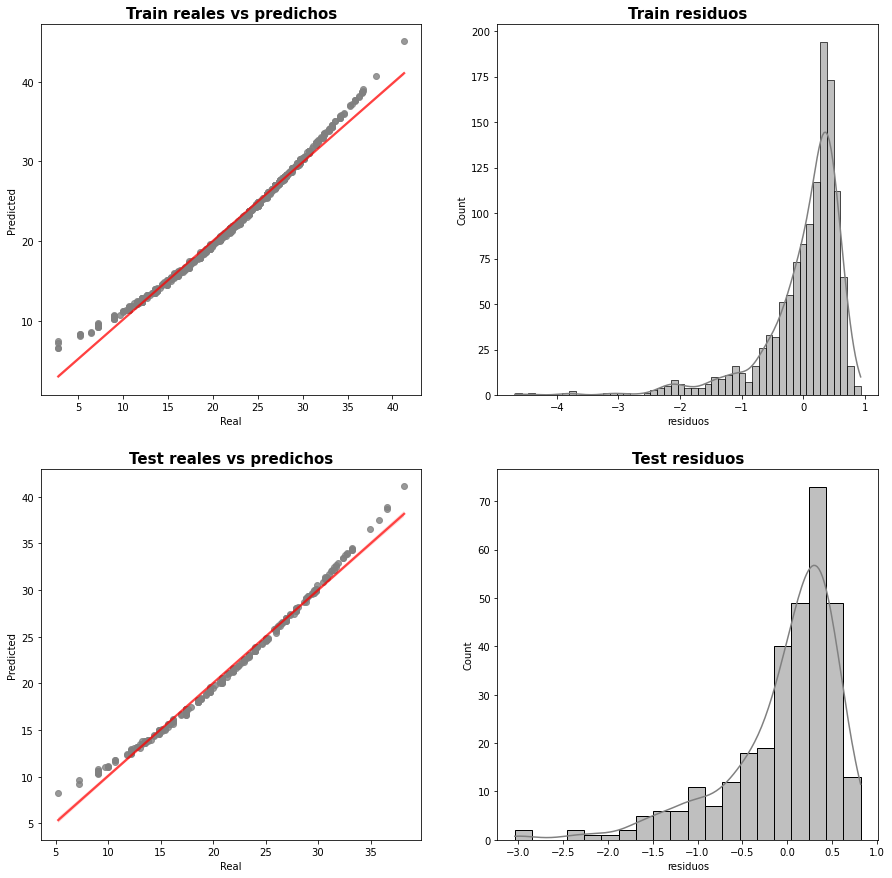

In [12]:
fig, ax = plt.subplots(2,2,figsize=(15,15))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados[resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
             x="residuos",
             color ="grey",
             kde=True, 
             ax = ax[0,1])


sns.histplot(resultados[resultados['Set'] == "Test"],
             x="residuos",
             color = "grey",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

Cálculo de las métricas

In [13]:
#Para el conjunto de entrenamsiento las métricas han sido

print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(y_train,y_predict_train))
print('El MAE es',mean_absolute_error(y_train,y_predict_train))
print('El MSE es',mean_squared_error(y_train,y_predict_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_predict_train)))

Para el conjunto train:---------------
El valor de r2 score es  0.9891849016612178
El MAE es 0.46891152796387947
El MSE es 0.4536421449620083
EL RMSE es  0.6735296169894894


In [14]:
# Para el conjunto de test las métricas han sido

print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(y_test,y_predict_test))
print('El MAE es',mean_absolute_error(y_test,y_predict_test))
print('El MSE es',mean_squared_error(y_test,y_predict_test))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_predict_test)))

Para el conjunto test:---------------
El valor de r2 score es  0.9908055147713373
El MAE es 0.459945808883166
El MSE es 0.4094236248184802
EL RMSE es  0.6398621920526952


In [15]:
resultados_metricas = {'MAE': [mean_absolute_error(y_test, y_predict_test), mean_absolute_error(y_train, y_predict_train)],
                       'MSE': [mean_squared_error(y_test, y_predict_test), mean_squared_error(y_train, y_predict_train)],
                       'RMSE': [np.sqrt(mean_squared_error(y_test, y_predict_test)), np.sqrt(mean_squared_error(y_train, y_predict_train))],
                       'R2':  [r2_score(y_test, y_predict_test), r2_score(y_train, y_predict_train)],
                       "set": ["test", "train"], "modelo": ["Linear Regresion", "LinearRegression"]}

df_resultados = pd.DataFrame(resultados_metricas)
df_resultados

,MAE,MSE,RMSE,R2,set,modelo
0,0.459946,0.409424,0.639862,0.990806,test,Linear Regresion
1,0.468912,0.453642,0.673530,0.989185,train,LinearRegression


In [16]:
df_resultados.to_csv('datos/pokePdresultados.csv')

Interpretar resultados:

Tras haber realizado el ajuste lineal, hemos empleado diversas métricas o estimaciones de la bondad, es decir, como de bueno es nuestro modelo prediciendo nuevos datos.

- R2: si nos fijamos en el test, tenemos un valor de 0.99, es decir, nuestro modelo con nuestras variables predictoras explica un 99% de la variación de los datos de la velocidad, que es nuestra variable respuesta (horquilla de error)

- Los valores del train son ligeramente peores, pero no tenemos underfitting con esta diferencia.

- En nuestro caso los valores del test son mejores que los del train, las diferencias que tenemos respecto a los valores que hemos visto en las gráficas son muy pequeñas, los datos están bastante ajustados a la línea de regresión. Los datos sugieren que los valores del test son mejores que los del train, pero con estas diferencias tampoco hay tanta diferencia como para asegurar que tengamos overfitting.